In [55]:
# import libraries
import missingno
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt

In [2]:
# import datasets
US = pd.read_csv('D:\\Data Sets\\YouTube\\data\\USvideos.csv')
CA = pd.read_csv('D:\\Data Sets\\YouTube\\data\\CAvideos.csv')
FR = pd.read_csv('D:\\Data Sets\\YouTube\\data\\FRvideos.csv')
GB = pd.read_csv('D:\\Data Sets\\YouTube\\data\\GBvideos.csv')
KR = pd.read_csv('D:\\Data Sets\\YouTube\\data\\KRvideos.csv',encoding='ANSI')
DE = pd.read_csv('D:\\Data Sets\\YouTube\\data\\DEvideos.csv')
JP = pd.read_csv('D:\\Data Sets\\YouTube\\data\\JPvideos.csv',encoding='ANSI')
IND = pd.read_csv('D:\\Data Sets\\YouTube\\data\\INvideos.csv')
MX = pd.read_csv('D:\\Data Sets\\YouTube\\data\\MXvideos.csv',encoding='ANSI')
RU = pd.read_csv('D:\\Data Sets\\YouTube\\data\\RUvideos.csv',encoding='ANSI')

In [3]:
# combine all sub parts to one
df = pd.DataFrame(columns=US.columns)
data = [US,CA,FR,GB,KR,DE,JP,IND,MX,RU]

for sub in data:
    df = df.append(sub)

df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,18.14.06,Ð£ Ð¼ÐµÐ½Ñ Ð¡Ð”Ð’Ð“! (Story booth Ð½Ð° Ñ€ÑƒÑ...,Pastime Time,22,2018-06-13T13:47:01.000Z,"story booth Ð½Ð° Ñ€ÑƒÑÑÐºÐ¾Ð¼|""story booth Ð...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,ÐšÐ¾Ñ‚Ð¸ÐºÐ¸ Ð² Blade and Soul - https://bit.l...
40735,tX7p7NtNVDE,18.14.06,ÐœÐ¾Ð¸ Ð”ÐµÑ‚ÑÐºÐ¸Ðµ Ð¢Ñ€Ð°Ð²Ð¼Ñ‹ 2 (Ð°Ð½Ð¸Ð¼...,CaGArt,23,2018-06-12T09:38:38.000Z,"ÐºÐ°Ð³Ð°Ñ€Ñ‚|""ÐºÐ°Ð³Ð¸""|""Ñ†Ð°Ð³Ð°Ñ€Ñ‚""|""Ð³Ð°Ð³...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,ÐœÐ¾Ð¸ Ð”ÐµÑ‚ÑÐºÐ¸Ðµ Ð¢Ñ€Ð°Ð²Ð¼Ñ‹ 2 (Ð°Ð½Ð¸Ð¼...
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...
40737,4PiSLIrsSiY,18.14.06,ÐžÐ‘Ð—ÐžÐ Ð’ÐÐÐÐžÐ™ ÐšÐžÐœÐÐÐ¢Ð«ðŸ›/Ð¢Ð...,ÐšÑÑŽÑˆÐ° Ð›ÐµÐ±ÐµÐ´ÐµÐ²Ð°,22,2018-06-13T00:23:33.000Z,"Ñ€ÑƒÐ¼ Ñ‚ÑƒÑ€ Ð²Ð°Ð½Ð½Ð¾Ð¹ ÐºÐ¾Ð¼Ð½Ð°Ñ‚Ñ‹|""roo...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"ÐžÐ±Ð·Ð¾Ñ€ Ð²Ð°Ð½Ð½Ð¾Ð¹ ÐºÐ¾Ð¼Ð½Ð°Ñ‚Ñ‹, Ñ‚ÑƒÐ°..."


In [4]:
# drop unwanted features
df.drop(labels=['video_id','title','channel_title','tags',
                'thumbnail_link','description','trending_date','publish_time'],
        axis=1,
        inplace=True)
df

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,22,748374,57527,2966,15954,False,False,False
1,24,2418783,97185,6146,12703,False,False,False
2,23,3191434,146033,5339,8181,False,False,False
3,24,343168,10172,666,2146,False,False,False
4,24,2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...,...
40734,22,129488,5893,164,990,False,False,False
40735,23,99163,4659,337,692,False,False,False
40736,24,449611,24808,93,974,False,False,False
40737,22,14225,793,39,209,False,False,False


In [5]:
cols_with_bool = ['comments_disabled','ratings_disabled','video_error_or_removed']

for col in cols_with_bool:
    df[col] = df[col].apply(lambda x: 0 if x==False else 1 )

In [6]:
# df.reset_index(inplace=True)
df.drop(['index'],
        axis=1,
        inplace=True)
df

KeyError: "['index'] not found in axis"

In [8]:
for col in df.columns:
    df[col] = df[col].astype(dtype=int)

df.dtypes

category_id               int32
views                     int32
likes                     int32
dislikes                  int32
comment_count             int32
comments_disabled         int32
ratings_disabled          int32
video_error_or_removed    int32
dtype: object

In [9]:
# split data set to test,train (20/80)
x_train,x_test = train_test_split(df,
                                                 test_size=0.2,
                                                 random_state=42)

In [10]:
x_test.shape,x_train.shape

((75189, 8), (300753, 8))

In [11]:
x_train.describe(include='all')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,300753.000000,3.007530e+05,3.007530e+05,3.007530e+05,3.007530e+05,300753.000000,300753.000000,300753.000000
mean,20.224437,1.339033e+06,3.807758e+04,2.160651e+03,4.275398e+03,0.022686,0.019494,0.000702
std,7.143285,7.272877e+06,1.657753e+05,2.330912e+04,2.559893e+04,0.148902,0.138255,0.026478
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,17.000000,4.685000e+04,6.680000e+02,4.100000e+01,1.080000e+02,0.000000,0.000000,0.000000
50%,23.000000,1.773450e+05,3.436000e+03,1.790000e+02,5.120000e+02,0.000000,0.000000,0.000000
75%,24.000000,6.473630e+05,1.745600e+04,7.490000e+02,2.009000e+03,0.000000,0.000000,0.000000
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,1.000000,1.000000,1.000000


In [12]:
type(x_train.describe(include='all'))

pandas.core.frame.DataFrame

In [13]:
x_train.groupby('category_id').groups.keys()

dict_keys([1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43, 44])

In [14]:
x_train.groupby('category_id').agg(np.mean)

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
1,1.317070e+06,27982.998090,1186.540945,3098.220186,0.024591,0.023397,0.004357
2,3.544752e+05,9707.993249,537.275773,1280.413918,0.015321,0.015840,0.000519
10,6.074091e+06,169833.305626,6971.669851,14444.248901,0.005626,0.005391,0.001553
15,4.221975e+05,11636.397024,316.629862,1669.478987,0.019838,0.018272,0.000261
17,7.926207e+05,16994.028139,1060.978395,1954.026242,0.022132,0.019287,0.000211
19,4.102581e+05,7362.228169,400.740845,1226.697183,0.011268,0.004930,0.000000
20,6.744095e+05,25670.355007,1739.217788,4288.046863,0.017723,0.011634,0.000217
22,4.403690e+05,12824.430662,1035.584618,1863.357567,0.020273,0.026607,0.000162
23,8.201183e+05,40350.426727,1535.218425,4101.956445,0.006129,0.010076,0.000139


In [15]:
len(df.dropna())

375942

In [16]:
# check na values
df.aggregate(lambda x: x.isna().sum())

category_id               0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [17]:
# exploretary analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 40738
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   category_id             375942 non-null  int32
 1   views                   375942 non-null  int32
 2   likes                   375942 non-null  int32
 3   dislikes                375942 non-null  int32
 4   comment_count           375942 non-null  int32
 5   comments_disabled       375942 non-null  int32
 6   ratings_disabled        375942 non-null  int32
 7   video_error_or_removed  375942 non-null  int32
dtypes: int32(8)
memory usage: 14.3 MB


In [18]:
df.head()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,22,748374,57527,2966,15954,0,0,0
1,24,2418783,97185,6146,12703,0,0,0
2,23,3191434,146033,5339,8181,0,0,0
3,24,343168,10172,666,2146,0,0,0
4,24,2095731,132235,1989,17518,0,0,0


In [19]:
np.std(df[['views','likes','dislikes']],
       axis=0)

views       7.098558e+06
likes       1.654129e+05
dislikes    2.248434e+04
dtype: float64

In [20]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
category_id,375942.0,2.023230e+01,7.132413e+00,1.0,17.0,23.0,24.00,44.0
views,375942.0,1.326568e+06,7.098568e+06,117.0,46978.0,177370.5,647679.25,424538912.0
likes,375942.0,3.788431e+04,1.654131e+05,0.0,669.0,3446.0,17476.50,5613827.0
dislikes,375942.0,2.126107e+03,2.248437e+04,0.0,41.0,179.0,749.00,1944971.0
comment_count,375942.0,4.253775e+03,2.545876e+04,0.0,109.0,511.0,2011.00,1626501.0
comments_disabled,375942.0,2.251145e-02,1.483400e-01,0.0,0.0,0.0,0.00,1.0
ratings_disabled,375942.0,1.943917e-02,1.380628e-01,0.0,0.0,0.0,0.00,1.0
video_error_or_removed,375942.0,6.729762e-04,2.593309e-02,0.0,0.0,0.0,0.00,1.0


In [45]:
masked_df = df.isnull()
nulls = pd.DataFrame(masked_df.sum(),columns=['null_count']).reset_index()
nulls.rename(columns={'index':'feature'},
                      inplace=True)
percentage = pd.DataFrame(masked_df.mean()*100,columns=['null_percent']).reset_index()
percentage.rename(columns={'index':'feature'},
                      inplace=True)
missing_info = pd.merge(nulls,
                        percentage,
                        on='feature',
                        how='inner')
missing_info

,feature,null_count,null_percent
0,category_id,0,0.0
1,views,0,0.0
2,likes,0,0.0
3,dislikes,0,0.0
4,comment_count,0,0.0
5,comments_disabled,0,0.0
6,ratings_disabled,0,0.0
7,video_error_or_removed,0,0.0


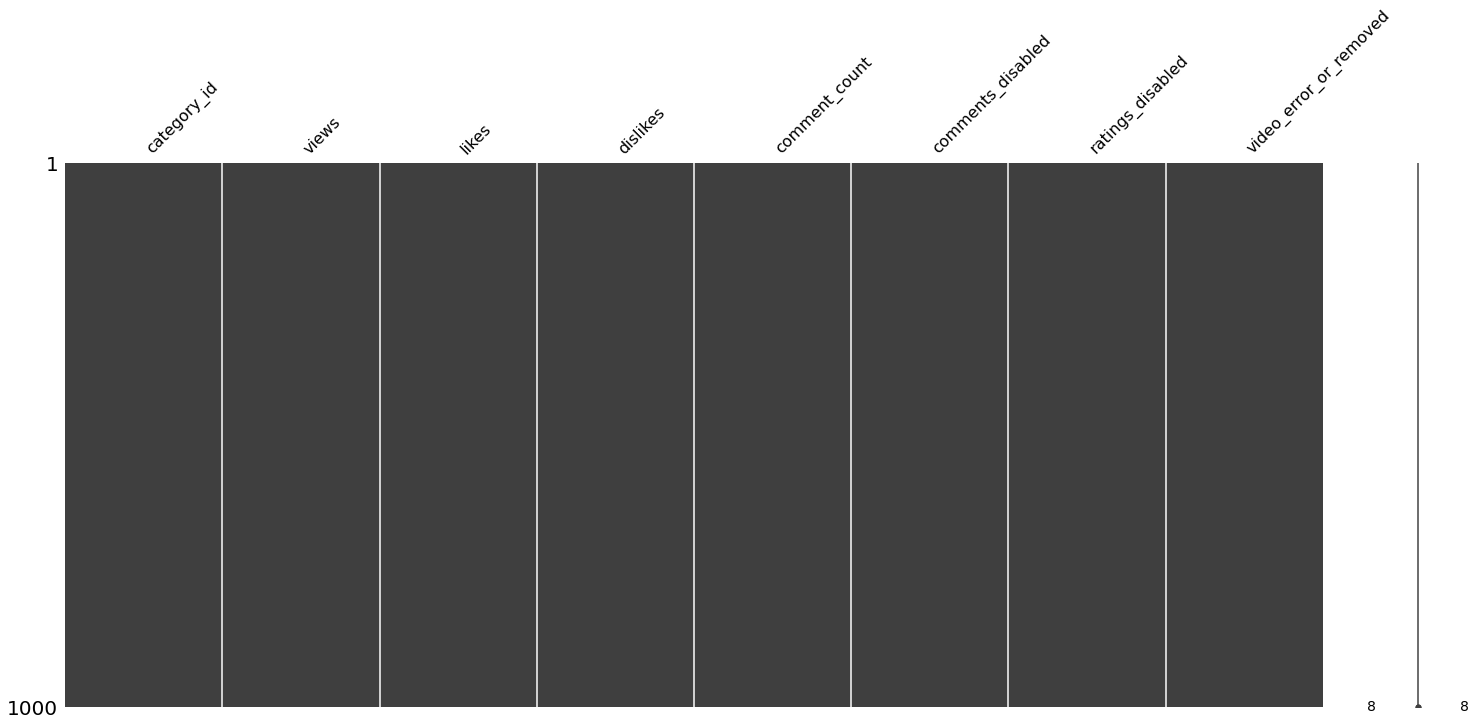

In [51]:
# nullity matrix
missingno.matrix(df.sample(1000))
plt.show()

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:311: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:311: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


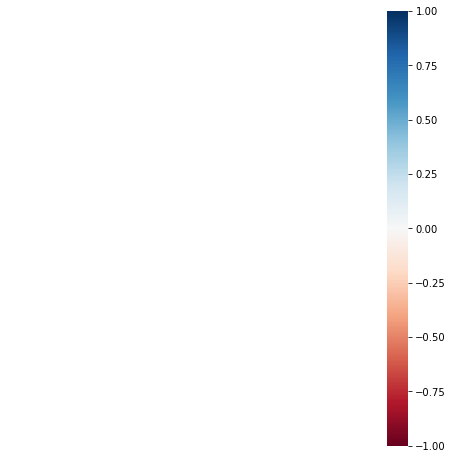

In [52]:
# nullity heatmap
missingno.heatmap(df,figsize=[8,8])
plt.show()

In [54]:
# filling null values using pandas
df_sample = df.sample(10000)
df_sample.fillna(0,
                 inplace=True)
df_sample

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
31903,22,43383,779,121,698,0,0,0
9670,24,578610,15562,338,2462,0,0,0
30405,10,765278,62390,432,3582,0,0,0
3951,23,2484,194,9,11,0,0,0
20826,22,2693,97,1,11,0,0,0
...,...,...,...,...,...,...,...,...
37519,24,848668,6789,549,1196,0,0,0
18433,26,217232,4504,129,106,0,0,0
30310,24,48714,1105,19,148,0,0,0
30516,24,225522,9942,119,1424,0,0,0


In [56]:
# filling values scikit-learn
num_cols = ['views','likes','dislikes','comment_count']
imp = SimpleImputer(missing_values=np.nan,
                    strategy='mean')
df_sample[num_cols] = imp.fit_transform(df_sample[num_cols])
df_sample[num_cols]

,views,likes,dislikes,comment_count
31903,43383.0,779.0,121.0,698.0
9670,578610.0,15562.0,338.0,2462.0
30405,765278.0,62390.0,432.0,3582.0
3951,2484.0,194.0,9.0,11.0
20826,2693.0,97.0,1.0,11.0
...,...,...,...,...
37519,848668.0,6789.0,549.0,1196.0
18433,217232.0,4504.0,129.0,106.0
30310,48714.0,1105.0,19.0,148.0
30516,225522.0,9942.0,119.0,1424.0


In [60]:
df_sample[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 31903 to 28492
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   views          10000 non-null  float64
 1   likes          10000 non-null  float64
 2   dislikes       10000 non-null  float64
 3   comment_count  10000 non-null  float64
dtypes: float64(4)
memory usage: 390.6 KB


In [70]:
# fill values using inferred values
cat_mean = df.groupby(['category_id'])[num_cols].mean()
dict_cat_mean = cat_mean.comment_count.to_dict()
imputed_values = df_sample.dislikes.map(dict_cat_mean)
df_sample['dislikes'] = np.where(df_sample.dislikes.isnull(),
                                 imputed_values,
                                 df_sample.dislikes)
df_sample[['dislikes']]

,dislikes
31903,121.0
9670,338.0
30405,432.0
3951,9.0
20826,1.0
...,...
37519,549.0
18433,129.0
30310,19.0
30516,119.0


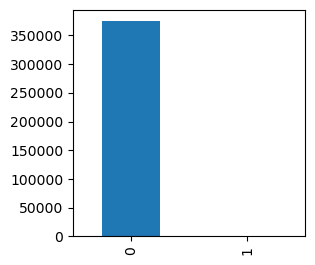

In [93]:
# distributions
plt.figure(figsize=[3,3],dpi=100)
df.video_error_or_removed.value_counts().plot(kind='bar')
plt.show()

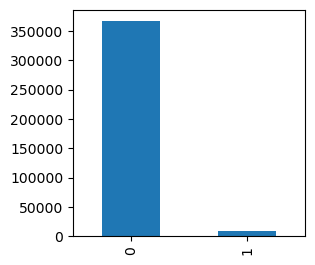

In [92]:
plt.figure(figsize=[3,3],dpi=100)
df.comments_disabled.value_counts().plot(kind='bar')
plt.show()

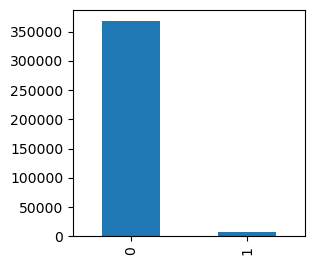

In [94]:
plt.figure(figsize=[3,3],dpi=100)
df.ratings_disabled.value_counts().plot(kind='bar')
plt.show()